In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import importlib
import random
import scipy.optimize as op

In [3]:
# import our own files and reload
import market_data
importlib.reload(market_data)
import capm
importlib.reload(capm)
import portfolio
importlib.reload(portfolio)


<module 'portfolio' from 'c:\\Users\\candy\\Downloads\\Reto_actinver\\quantitative-investment-analysis\\portfolio.py'>

['ASURB.MX', 'ATOS.MX', 'GME.MX', 'RIVN.MX', 'X.MX', 'MARA.MX', 'OMAB.MX', 'NCLHN.MX', 'GAPB.MX', 'LCID.MX']


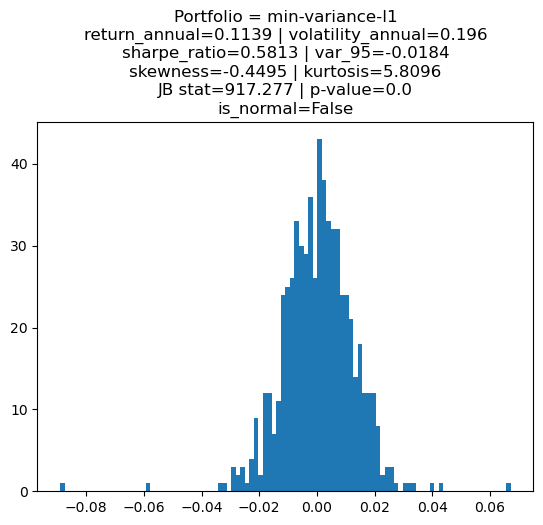

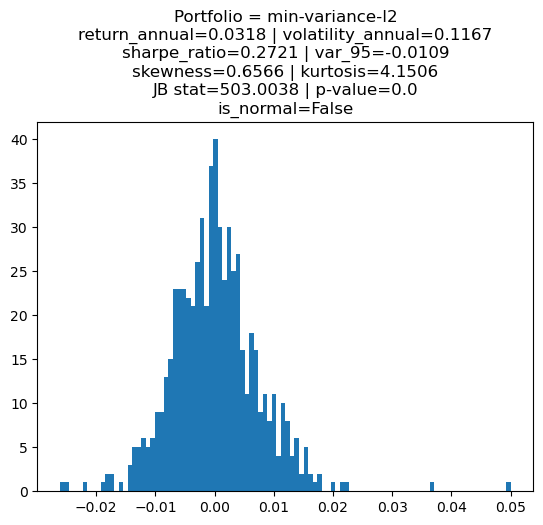

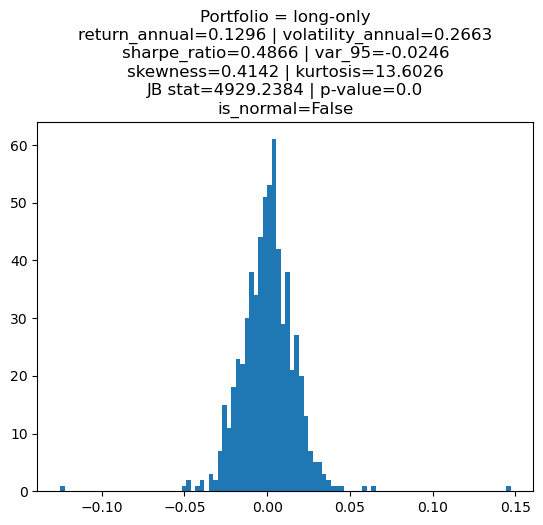

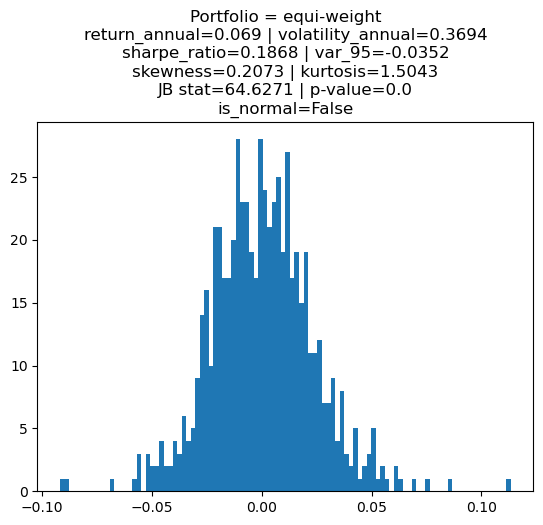

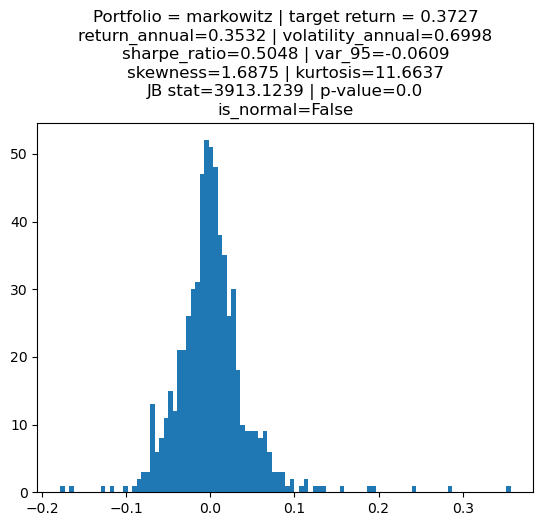

In [4]:
# inputs
notional = 1 # in mn USD
# universe = [
#     "AA1.MX", "AAL.MX", "AAPL.MX", "AAUN.MX", "ABBV.MX", "ABNB.MX", "AC.MX",
#     "ACTINVRB.MX", "AFRM.MX", "AGNC.MX", "ALFAA.MX", "ALPEKA.MX", "ALSEA.MX",
#     "AMAT.MX", "AMD.MX", "AMXB.MX", "AMZN.MX", "APA.MX", "ASURB.MX", "ATER.MX",
#     "ATOS.MX", "ATVI.MX", "AVGO.MX", "AXP.MX", "BA.MX", "BABAN.MX", "BAC.MX",
#     "BBAJIOO.MX", "BBBY.MX", "BIMBOA.MX", "BMY.MX", "BNGO.MX", "BOLSAA.MX",
#     "BRKB.MX", "BYND.MX", "C.MX", "CAT.MX", "CCL1N.MX", "CEMEXCPO.MX", 
#     "CHDRAUIB.MX", "CLF.MX", "COST.MX", "CPE.MX", "CRM.MX", "CSCO.MX", 
#     "CUERVO.MX", "CVS.MX", "CVX.MX", "DAL.MX", "DIS.MX", "DVN.MX", "ELEKTRA.MX", 
#     "ETSY.MX", "F.MX", "FANG.MX", "FCX.MX", "FDX.MX", "FEMSAUBD.MX", 
#     "FIBRAMQ12.MX", "FIBRAPL14.MX", "FSLR.MX", "FUBO.MX", "FUNO11.MX", 
#     "GAPB.MX", "GCARSOA1.MX", "GCC.MX", "GE.MX", "GENTERA.MX", "GFINBURO.MX", 
#     "GFNORTEO.MX", "GILD.MX", "GM.MX", "GME.MX", "GMEXICOB.MX", "GOLDN.MX", 
#     "GOOGL.MX", "GRUMAB.MX", "HD.MX", "INTC.MX", "JNJ.MX", "JPM.MX", 
#     "KIMBERA.MX", "KO.MX", "KOFUBL.MX", "LABB.MX", "LASITEB-1.MX", "LCID.MX", 
#     "LIVEPOLC-1.MX", "LLY.MX", "LUV.MX", "LVS.MX", "LYFT.MX", "MA.MX", 
#     "MARA.MX", "MCD.MX", "MEGACPO.MX", "MELIN.MX", "META.MX", "MFRISCOA-1.MX", 
#     "MGM.MX", "MRK.MX", "MRNA.MX", "MRO.MX", "MSFT.MX", "MU.MX", "NCLHN.MX", 
#     "NFLX.MX", "NKE.MX", "NKLA.MX", "NUN.MX", "NVAX.MX", "NVDA.MX", "OMAB.MX", 
#     "ORBIA.MX", "ORCL.MX", "OXY1.MX", "PARA.MX", "PBRN.MX", "PE&OLES.MX", 
#     "PEP.MX", "PFE.MX", "PG.MX", "PINFRA.MX", "PINS.MX", "PLTR.MX", "PYPL.MX", 
#     "Q.MX", "QCOM.MX", "RA.MX", "RCL.MX", "RIOT.MX", "RIVN.MX", "ROKU.MX", 
#     "SBUX.MX", "SHOPN.MX", "SITES1A-1.MX", "SKLZ.MX", "SOFI.MX", "SPCE.MX", 
#     "SQ.MX", "T.MX", "TALN.MX", "TERRA13.MX", "TGT.MX", "TELEVISACPO.MX", 
#     "TMO.MX", "TSLA.MX", "TSMN.MX", "TWLO.MX", "TX.MX", "UAL.MX", "UBER.MX", 
#     "UNH.MX", "UPST.MX", "V.MX", "VESTA.MX", "VOLARA.MX", "VZ.MX", "WALMEX.MX", 
#     "WFC.MX", "WISH.MX", "WMT.MX", "WYNN.MX", "X.MX", "XOM.MX", "ZM.MX"
# ]
# rics = random.sample(universe, 10)

#crecimiento
# rics = ['NCLHN.MX', 'KOFUBL.MX', 'FIBRAMQ12.MX', 'MA.MX', 'CEMEXCPO.MX', \
#         'AC.MX', 'CAT.MX', 'MGM.MX', 'GFNORTEO.MX', 'CHDRAUIB.MX']

#Menos volatilidad
# rics = ['ACTINVRB.MX', 'MA.MX', 'JNJ.MX', 'CSCO.MX', 'PG.MX', \
#                    'JPM.MX', 'TERRA13.MX', 'CHDRAUIB.MX', 'AMXB.MX', 'MRK.MX']

#Sharpe ratio
rics = ['ASURB.MX', 'ATOS.MX', 'GME.MX', 'RIVN.MX', 'X.MX', \
               'MARA.MX', 'OMAB.MX', 'NCLHN.MX', 'GAPB.MX', 'LCID.MX']
print(rics)

# initialise the instance of the class
port_mgr = portfolio.manager(rics, notional)

# compute correlation and variance-covariance matrix
port_mgr.compute_covariance()

# compute the desired portfolios: output class = portfolio.output
port_min_variance_l1 = port_mgr.compute_portfolio('min-variance-l1')
port_min_variance_l2 = port_mgr.compute_portfolio('min-variance-l2')
port_long_only = port_mgr.compute_portfolio('long-only')
port_equi_weight = port_mgr.compute_portfolio('equi-weight')
port_markowitz = port_mgr.compute_portfolio('markowitz', target_return=0.4)

# plot the histograms of returns for the desired portfolio
port_min_variance_l1.plot_histogram()
port_min_variance_l2.plot_histogram()
port_long_only.plot_histogram()
port_equi_weight.plot_histogram()
port_markowitz.plot_histogram()
    

In [5]:
# Imprimir los pesos y asignaciones para cada portafolio
print("Pesos y asignaciones del portafolio Min-Variance L1:")
print(port_min_variance_l1.dataframe_allocation)

print("\nPesos y asignaciones del portafolio Min-Variance L2:")
print(port_min_variance_l2.dataframe_allocation)

print("\nPesos y asignaciones del portafolio Long-Only:")
print(port_long_only.dataframe_allocation)

print("\nPesos y asignaciones del portafolio Equi-Weight:")
print(port_equi_weight.dataframe_allocation)

print("\nPesos y asignaciones del portafolio Markowitz:")
print(port_markowitz.dataframe_allocation)

Pesos y asignaciones del portafolio Min-Variance L1:
       rics   returns  volatilities   weights  allocation
0  ASURB.MX  0.115096      0.331451  0.215323    0.215323
1   ATOS.MX  0.337336      0.735973  0.053681    0.053681
2    GME.MX  0.372770      1.148249 -0.035917   -0.035917
3   RIVN.MX -0.315278      0.765391  0.118233    0.118233
4      X.MX  0.157288      0.532021  0.129177    0.129177
5   MARA.MX  0.264421      1.138774 -0.067147   -0.067147
6   OMAB.MX  0.071534      0.373109  0.111372    0.111372
7  NCLHN.MX  0.249975      0.593909  0.096941    0.096941
8   GAPB.MX  0.070502      0.371728  0.039406    0.039406
9   LCID.MX -0.633609      0.828458 -0.132804   -0.132804

Pesos y asignaciones del portafolio Min-Variance L2:
       rics   returns  volatilities   weights  allocation
0  ASURB.MX  0.115096      0.331451  0.502732    0.502732
1   ATOS.MX  0.337336      0.735973  0.007936    0.007936
2    GME.MX  0.372770      1.148249 -0.000853   -0.000853
3   RIVN.MX -0.315278  